## Text Recommendation System for KAKAO Brunch User

### 글 조회 데이터 전처리
- 사용자의 과거 글 소비 기록을 통해 독자들의 소비 성향 판단
- 글 조회 기록만으로 협업 필터링 추천 가능

- read.tar

In [1]:
import os, sys
import tqdm

In [22]:
def iterate_data_files(from_dtm,to_dtm):
    from_dtm, to_dtm = map(str,[from_dtm, to_dtm])
    read_root = os.path.join('C:/Users/USER/DACON/Kakao_Brunch/brunch/','read')
    for fname in os.listdir(read_root):
        if len(fname) != len('2018100100_2018100103'):
            continue
        if from_dtm != 'None' and from_dtm > fname:
            continue
        if to_dtm != 'None' and fname > to_dtm:
            continue
        path = os.path.join(read_root, fname)
        yield path, fname

data = [];

files = sorted([path for path,_ in iterate_data_files('2018100100','2019022200')])

for path in tqdm.tqdm(files, mininterval=1):
    for line in open(path):
        tokens = line.strip().split()
        read_datetime = path[45:55]
        user_id = tokens[0]
        reads = tokens[1:]
        for item in reads:
            data.append([read_datetime, user_id, item])


100%|██████████████████████████████████████████████████████████████████████████████| 3456/3456 [02:44<00:00, 21.03it/s]


In [23]:
import pandas as pd

read_df = pd.DataFrame(data)
read_df.columns = ['date', 'user_id','article_id']

read_df.head()


,date,user_id,article_id
0,2018100100,#e208be4ffea19b1ceb5cea2e3c4dc32c,@kty0613_91
1,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@miamiyoung_31
2,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@banksalad_49
3,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@rlfrjsdn_95
4,2018100100,#0a3d493f3b2318be80f391eaa00bfd1c,@readme999_140


In [25]:
# 각 Column의 고유값 수
read_df.nunique()

date            3456
user_id       296520
article_id    495940
dtype: int64

3456시간 동안 약 29만명의 User가 49만 건의 글 조회

In [27]:
read_df.groupby('user_id').size().describe()

count    296520.000000
mean         70.746705
std         377.173485
min           1.000000
25%           3.000000
50%          10.000000
75%          39.000000
max       83688.000000
dtype: float64

User별 평균 70회의 글 조회, 중간값은 10회 <br>
가장 많은 글을 조회한 사용자 조회수 : 8만건 이상

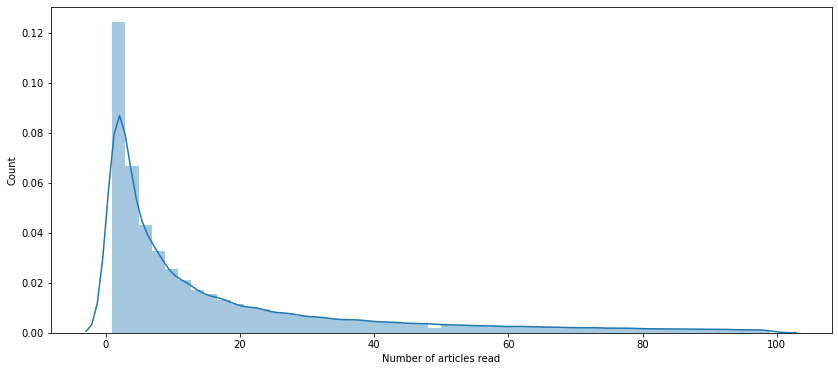

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

user_read_count_df = read_df.groupby('user_id').size().reset_index().rename(columns= {0:'count'})
plt.figure(figsize = (14,6))
# 조회수 100회 미만인 글들의 분포도
sns.distplot(user_read_count_df[user_read_count_df['count'] < 100]['count'])
plt.xlabel("Number of articles read")
plt.ylabel("Count")
plt.show()

In [33]:
user_read_count_df.head()

,user_id,count
0,#00001ba6ca8d87d2fc34d626ba9cfe6f,3
1,#0000d1188f75d0b0ea7a8e23a2b760e5,1
2,#0000e87158c1426d6ffb72cebac6cb64,2
3,#0000eea6d339abfd02ed590bc451fc63,1
4,#0000fdba8f35c76eacab74c5c6bc7f1a,5


In [35]:
read_df.groupby('article_id').size().describe()

count    495940.000000
mean         42.299095
std         283.270460
min           1.000000
25%           3.000000
50%           7.000000
75%          24.000000
max       96981.000000
dtype: float64

Brunch 글 별 평균 조회수 : 42회, 중간 값 : 7회 <br>
가장 많이 조회된 글의 조회수 : 9만 이상 <br>
<br>
__조회수 높은 글은 무엇일까?__

In [37]:
read_df.groupby('article_id').size().sort_values(ascending=False).reset_index().head(10)

,article_id,0
0,@brunch_141,96981
1,@brunch_145,30711
2,@tenbody_1305,25411
3,@intlovesong_28,21702
4,@hyehyodam_19,20506
5,@brunch_140,20033
6,@steven_179,19721
7,@brunch_142,19561
8,@sangheeshyn_66,18910
9,@deckey1985_51,18331


In [ ]:
@brunch는 브런치가 직접 운영하는 계정 <br>
@brunch가 생성한 글이 상위권에 많이 포함(상위 10개중 4개)

- 조회수가 높은 상위 20개의 글

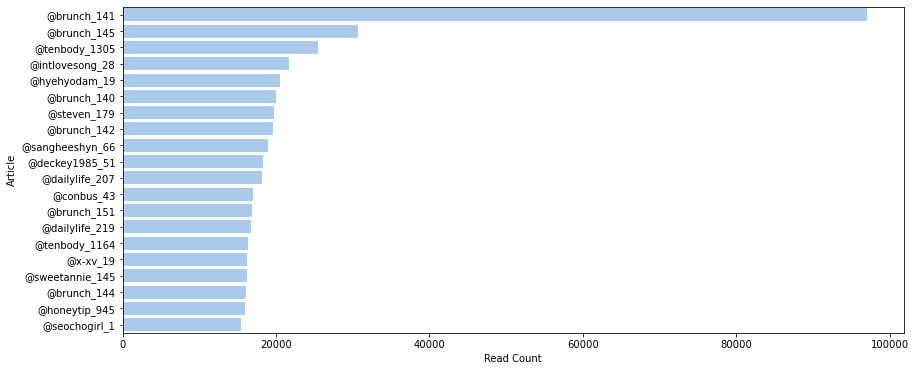

In [42]:
poppular_article_df = read_df.groupby('article_id').size().sort_values(ascending=False).\
                                        reset_index().rename(columns= {0:'read_count'})
plt.figure(figsize = (14,6))
sns.set_color_codes("pastel")
sns.barplot(x='read_count', y='article_id', data=poppular_article_df[0:20],
           label="Total", color="b")
plt.xlabel('Read Count')
plt.ylabel('Article')
plt.show()


### 글의 메타 데이터
- metadata.json

In [43]:
meta_df = pd.read_json('C:/Users/USER/DACON/Kakao_Brunch/brunch/metadata.json', lines=True)
meta_df.head()

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34


In [49]:
meta_df.shape

(643104, 9)

In [46]:
meta_df['id'].nunique()

643104

In [47]:
meta_df['user_id'].nunique()

19065

글을 작성한 작가는 19605명, 총 643104개의 글의 수

In [48]:
meta_df.groupby('user_id').size().describe()

count    19065.000000
mean        33.732179
std         87.706369
min          1.000000
25%          4.000000
50%         11.000000
75%         31.000000
max       4106.000000
dtype: float64

작가 별 평균 33편의 글 작성

In [51]:
meta_df['magazine_id'].nunique()

28028

In [52]:
meta_df[meta_df['magazine_id'] != 0].shape

(482281, 9)

In [53]:
meta_df.groupby('magazine_id').size().describe()

count     28028.000000
mean         22.945055
std         961.348331
min           1.000000
25%           3.000000
50%           8.000000
75%          18.000000
max      160823.000000
dtype: float64

magazine의 수는 28028 <br>
magazine에 속한 글은 482281개, 속하지 않은 글은 160283개 <br>
magazine에는 평균적으로 22.9편이 글이 존재

### 사용자 정보